In [1]:
import supy as sp
import pandas as pd
import numpy as np

path_runcontrol_estm = "./RunControl.nml"
path_runcontrol_ohm = "./RunControl_OHM.nml"

In [2]:
df_state_init_estm = sp.init_supy(path_runcontrol_estm)
df_state_init_estm["k_surf"] = 2.0
df_state_init_estm["cp_surf"] = 1878498.7463057041

df_state_init_ohm = sp.init_supy(path_runcontrol_ohm)

df_forcing = sp.util.read_forcing("./Input/Saeve_asphalt_2004_data_60.txt", tstep_mod=300)

2023-05-17 12:13:10,281 - SuPy - INFO - All cache cleared.
2023-05-17 12:13:11,685 - SuPy - INFO - All cache cleared.


In [3]:
kdown_df = df_forcing["kdown"].resample("h").mean() / np.max(df_forcing["kdown"].resample("h").mean())
kdown_df

2004-02-12 00:00:00    0.000000
2004-02-12 01:00:00    0.000000
2004-02-12 02:00:00    0.000000
2004-02-12 03:00:00    0.000000
2004-02-12 04:00:00    0.000118
                         ...   
2004-04-14 17:00:00    0.106521
2004-04-14 18:00:00    0.017465
2004-04-14 19:00:00    0.000988
2004-04-14 20:00:00    0.000000
2004-04-14 21:00:00    0.000000
Freq: H, Name: kdown, Length: 1510, dtype: float64

In [4]:
df_state_init_estm.compare(df_state_init_ohm)


var     storageheatmethod       k_surf                                         \
ind_dim                 0       (0, 0)       (0, 1)       (0, 2)       (0, 3)   
                     self other   self other   self other   self other   self   
grid                                                                            
1                       5     1    2.0   1.1    2.0   1.1    2.0   1.1    2.0   

var            ...       cp_surf                                      \
ind_dim        ...        (6, 0)                   (6, 1)              
        other  ...          self      other          self      other   
grid           ...                                                     
1         1.1  ...  1.878499e+06  1900000.0  1.878499e+06  1100000.0   

var                                                                      \
ind_dim        (6, 2)                   (6, 3)                   (6, 4)   
                 self      other          self      other          self   
grid                                                                      
1        1.878499e+06  1100000.0  1.878499e+06  1500000.0  1.878499e+06   

var                 
ind_dim             
             other  
grid                
1        1600000.0  

[1 rows x 142 columns]

In [5]:
df_output_estm, df_state_final_estm = sp.run_supy(
    df_forcing, df_state_init_estm, save_state=False
)
df_output_ohm, df_state_final_ohm = sp.run_supy(
    df_forcing, df_state_init_ohm, save_state=False
)


2023-05-17 12:13:13,783 - SuPy - INFO - ====================
2023-05-17 12:13:13,785 - SuPy - INFO - Simulation period:
2023-05-17 12:13:13,786 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-17 12:13:13,787 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-17 12:13:13,789 - SuPy - INFO - 
2023-05-17 12:13:13,790 - SuPy - INFO - No. of grids: 1
2023-05-17 12:13:13,791 - SuPy - INFO - SuPy is running in serial mode
2023-05-17 12:13:18,493 - SuPy - INFO - Execution time: 4.7 s
2023-05-17 12:13:18,494 - SuPy - INFO - ====================

2023-05-17 12:13:18,496 - SuPy - INFO - ====================
2023-05-17 12:13:18,498 - SuPy - INFO - Simulation period:
2023-05-17 12:13:18,499 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-17 12:13:18,500 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-17 12:13:18,501 - SuPy - INFO - 
2023-05-17 12:13:18,502 - SuPy - INFO - No. of grids: 1
2023-05-17 12:13:18,502 - SuPy - INFO - SuPy is running in serial mode
2023-05-17 12:13:22,446 - Su

In [6]:
df_output_estm["debug"].filter(like="QH")

var                       QH_Paved   QH_Bldgs  QH_EveTr   QH_DecTr   QH_Grass  \
grid datetime                                                                   
1    2004-02-12 00:05:00  6.539096 -56.203164 -4.239123  -4.239123  -8.064539   
     2004-02-12 00:10:00  6.213857 -56.203164 -4.412837  -4.412837  -7.996154   
     2004-02-12 00:15:00  5.916836 -56.203164 -4.587618  -4.594872  -7.966794   
     2004-02-12 00:20:00  5.623784 -56.203164 -4.753349  -4.773943  -7.945441   
     2004-02-12 00:25:00  5.334113 -56.203164 -4.910174  -4.949240  -7.928744   
...                            ...        ...       ...        ...        ...   
     2004-04-14 20:40:00  4.963228 -29.891849 -6.137441  -9.784149 -14.875551   
     2004-04-14 20:45:00  4.808551 -29.891849 -6.145330  -9.859118 -14.703952   
     2004-04-14 20:50:00  4.655467 -29.891849 -6.151491  -9.926918 -14.525617   
     2004-04-14 20:55:00  4.503818 -29.891849 -6.155825  -9.987373 -14.340507   
     2004-04-14 21:00:00  4.353883 -29.891849 -6.158762 -10.041165 -14.149659   

var                        QH_BSoil   QH_Water  
grid datetime                                   
1    2004-02-12 00:05:00  -8.064539 -16.151626  
     2004-02-12 00:10:00  -7.996154  -8.563182  
     2004-02-12 00:15:00  -7.966794  -8.704747  
     2004-02-12 00:20:00  -7.945441  -8.684474  
     2004-02-12 00:25:00  -7.928744  -8.666491  
...                             ...        ...  
     2004-04-14 20:40:00 -15.445450 -13.857910  
     2004-04-14 20:45:00 -15.275642 -13.678585  
     2004-04-14 20:50:00 -15.099233 -13.492123  
     2004-04-14 20:55:00 -14.916156 -13.298542  
     2004-04-14 21:00:00 -14.727468 -13.098859  

[18108 rows x 7 columns]

In [7]:
df_output_estm.loc[1, "debug"]["Tsfc_Paved"].resample("H").mean()

datetime
2004-02-12 00:00:00    -4.559058
2004-02-12 01:00:00    -4.722616
2004-02-12 02:00:00    -4.614036
2004-02-12 03:00:00    -4.555487
2004-02-12 04:00:00    -4.754273
                         ...    
2004-04-14 17:00:00    10.469379
2004-04-14 18:00:00     7.619280
2004-04-14 19:00:00     6.568918
2004-04-14 20:00:00     6.294788
2004-04-14 21:00:00     6.187612
Freq: H, Name: Tsfc_Paved, Length: 1510, dtype: float64

In [8]:
df_output_ohm.compare(df_output_estm).columns.remove_unused_levels().levels[0]


Index(['debug', 'RSL', 'SUEWS'], dtype='object', name='group')

In [9]:
df_comp = (
    pd.concat(
        {"ohm": df_output_ohm, "ehc": df_output_estm},
        axis=1,
        names=["method", "group", "var"],
    )
    .swaplevel("group", "method", axis=1)
    .swaplevel("var", "method", axis=1)
)


In [10]:
df_Ts_paved = df_comp.loc[1, "debug"].sort_index(axis=1).filter(like="Tsfc_P").resample("h", closed="left", label="right").mean()
df_Ts_paved = df_Ts_paved / np.max(df_Ts_paved)

In [11]:
import pandas as pd

ref_df = sp.util.read_suews(
    "./Input/Saeve_asphalt1_2004_ESTM_Ts_data_60.txt",
)


<Axes: >

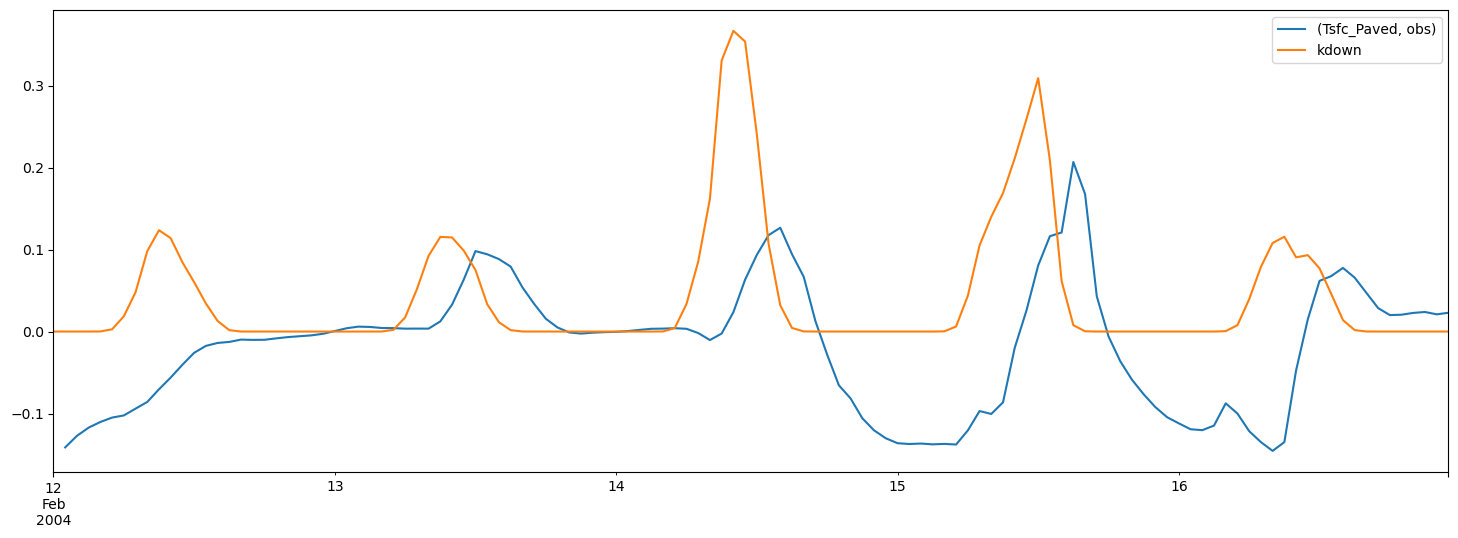

In [12]:
Ts_ref = ref_df["Tsurf"].rename(("Tsfc_Paved", "obs"))
Ts_ref = Ts_ref / np.max(Ts_ref)
# ref_df["Troad"]

ref_df = pd.concat([Ts_ref, kdown_df], axis=1)
ref_df.iloc[0:120].plot(figsize=(18,6))

<Axes: >

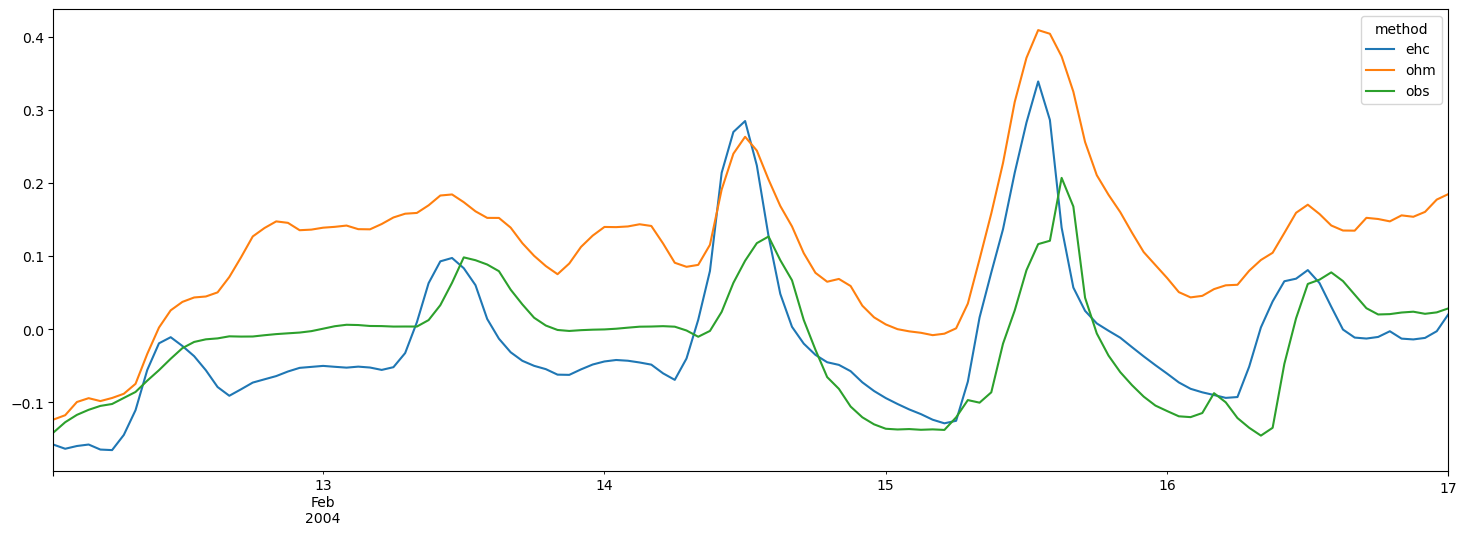

In [13]:
df_ts_comp = (
    pd.concat(
        [df_Ts_paved, Ts_ref],
        axis=1,
    )
    .dropna(axis=0, how="any")
    .droplevel(0, axis=1)
)

df_ts_comp.iloc[0:120].plot(figsize=(18,6))

(<Figure size 640x480 with 1 Axes>, <Axes: >)

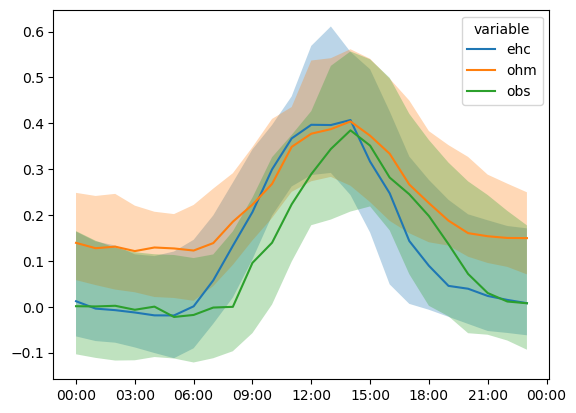

In [14]:
sp.util.plot_day_clm(df_ts_comp)

In [15]:
df_ts_comp

method,ehc,ohm,obs
2004-02-12 01:00:00,-0.157920,-0.123650,-0.141323
2004-02-12 02:00:00,-0.163586,-0.117701,-0.127284
2004-02-12 03:00:00,-0.159825,-0.099628,-0.117228
2004-02-12 04:00:00,-0.157797,-0.094406,-0.110319
2004-02-12 05:00:00,-0.164682,-0.098363,-0.104977
...,...,...,...
2004-04-14 17:00:00,0.481264,0.522502,0.576310
2004-04-14 18:00:00,0.362647,0.487332,0.501914
2004-04-14 19:00:00,0.263923,0.422397,0.390321
2004-04-14 20:00:00,0.227539,0.369806,0.299469
